In [1]:
from collections.abc import Callable
from typing import Optional
import torch
import math

In [2]:
class SGD(torch.optim.Optimizer):

    def __init__(self, params, lr=1e-3):
        if lr < 0:
            raise ValueError(f"Invalid learning rate: {lr}")
        defaults = {"lr": lr}
        super().__init__(params, defaults)

    def step(self, closure: Optional[Callable] = None):
        loss = None if closure is None else closure()
        for group in self.param_groups:
            lr = group["lr"] # Get the learning rate

            for p in group["params"]:
                if p.grad is None:
                    continue
                state = self.state[p] # Get state associated with p.
                t = state.get("t", 0) # Get iteration number from the state, or initial value.
                grad = p.grad.data # Get the gradient of loss with respect to p.
                p.data -= lr / math.sqrt(t + 1) * grad # Update weight tensor in-place.
                state["t"] = t + 1 # Increment iteration number.
                return loss

In [3]:
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
opt = SGD([weights], lr=1)

In [4]:
for t in range(100):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step.

25.010469436645508
24.02005386352539
23.345468521118164
22.809438705444336
22.355531692504883
21.957412719726562
21.600313186645508
21.274982452392578
20.975173950195312
20.696435928344727
20.435470581054688
20.18975257873535
19.957294464111328
19.73650360107422
19.526073455810547
19.324932098388672
19.132164001464844
18.947004318237305
18.7687931060791
18.596952438354492
18.430988311767578
18.27046012878418
18.11498260498047
17.964208602905273
17.81783103942871
17.675573348999023
17.537185668945312
17.402442932128906
17.271142959594727
17.143095016479492
17.018129348754883
16.896085739135742
16.776824951171875
16.660207748413086
16.54611587524414
16.434432983398438
16.325050354003906
16.217876434326172
16.112812042236328
16.00977325439453
15.90867805480957
15.809453010559082
15.712023735046387
15.616328239440918
15.522302627563477
15.429882049560547
15.33901596069336
15.249648094177246
15.161731719970703
15.075218200683594
14.990059852600098
14.90621566772461
14.823646545410156
14.742

In [5]:
opt = SGD([weights], lr=10)
for t in range(10):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step.

11.865350723266602
7.59382438659668
5.597843170166016
4.379714488983154
3.5475683212280273
2.941340923309326
2.4806313514709473
2.119769811630249
1.8305882215499878
1.5946455001831055


In [6]:
opt = SGD([weights], lr=10)
for t in range(20):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step.

1.3993158340454102
0.8955620527267456
0.6601700782775879
0.5165126323699951
0.4183751940727234
0.34688103199005127
0.2925480902194977
0.24999068677425385
0.215886652469635
0.18806123733520508
0.16502541303634644
0.14572268724441528
0.12938180565834045
0.11542629450559616
0.10341650247573853
0.09301145374774933
0.08394284546375275
0.07599671185016632
0.06900055706501007
0.0628138929605484


In [7]:
opt = SGD([weights], lr=30)
for t in range(10):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step.

0.05732128024101257
0.009171404875814915
0.003040062729269266
0.0012986530782654881
0.0006363400025293231
0.0003406605974305421
0.0001942113012773916
0.00011611334775807336
7.207573071355e-05
4.612846169038676e-05


In [8]:
import pandas as pd

In [10]:
df = pd.read_csv("/root/scratchformer/checkpoints/RUN_LR2e4_DM768_NL8_NH16_FF2048_BS64_CL512_WD001/metrics.csv").set_index('step')

In [11]:
df.head()

,lr,train_loss,ema_loss,val_loss,grad_norm,tok_per_s,elapsed_s
step,,,,,,,
1,0.000000,11.325184,11.325184,11.307523,5.176494,5658.688385,5.790741
10,0.000004,11.142019,11.294049,11.097614,5.246981,191743.757673,1.708947
20,0.000008,10.548866,11.102663,10.449252,4.859261,172791.421756,1.896390
30,0.000012,9.679905,10.668383,9.562382,4.020577,172751.871887,1.896825
40,0.000016,8.885066,10.064283,8.837377,2.681456,171467.502359,1.911033


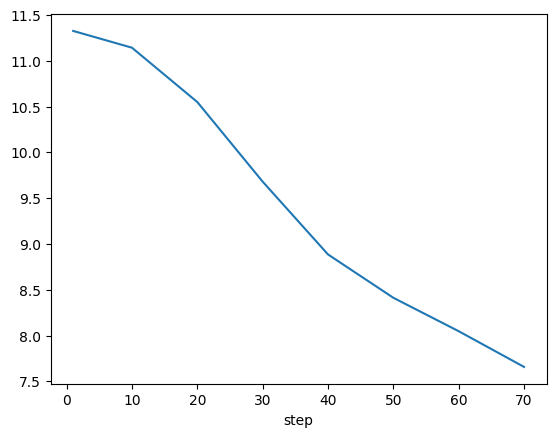

In [13]:
df.train_loss.plot();

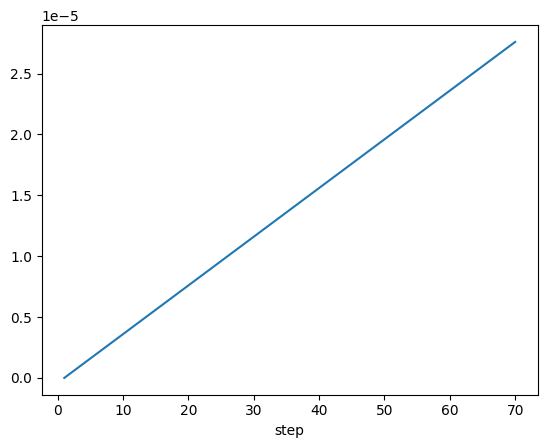

In [14]:
df.lr.plot();

In [15]:
df.elapsed_s.cumsum().iloc[-1] / 3600 * 60

np.float64(0.3150907397270203)